In [806]:
import numpy as np 
from math import *
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import spline
import datetime

from sklearn.neighbors import NearestNeighbors

%matplotlib inline

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

import matplotlib
matplotlib.style.use('ggplot')
pd.options.display.max_rows = 100

import warnings
%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
warnings.filterwarnings('ignore')

### Load Data


In [807]:
########################################################
# Define variables which we will use later in the script
########################################################

parse_date_cols = ['dt_prediction_date', 'dt_target_date', 'dt_flight_date']
target_cols = ['num_pax_000_014_mins_before_sdt', 'num_pax_015_029_mins_before_sdt', 'num_pax_030_044_mins_before_sdt', 'num_pax_045_059_mins_before_sdt', 'num_pax_060_074_mins_before_sdt', 'num_pax_075_089_mins_before_sdt', 'num_pax_090_104_mins_before_sdt', 'num_pax_105_119_mins_before_sdt',  'num_pax_120_134_mins_before_sdt', 'num_pax_135_149_mins_before_sdt', 'num_pax_150_164_mins_before_sdt', 'num_pax_165_179_mins_before_sdt',  'num_pax_180_194_mins_before_sdt', 'num_pax_195_209_mins_before_sdt', 'num_pax_210_224_mins_before_sdt', 'num_pax_225_239_mins_before_sdt', 'num_pax_240plus_mins_before_sdt']


In [808]:
###############################################
# Read in csv file and parse dates. Also generate dataframe with the target cases ordered by id
###############################################
df = pd.read_csv("./train.csv", parse_dates = parse_date_cols)
df_target_cases = df[df['cat_case_type'] == 'Target'].sort_index()[target_cols]
df_train=df[df['cat_case_type']=='Expl']
df_target=df[df['cat_case_type']=='Target']


### Normalise Data

In [810]:
df_train['num_flight_month']=np.sin(np.pi*df_train['num_flight_month']/24)
df_train['num_flight_weekofyear']=np.sin(np.pi*df_train['num_flight_weekofyear']/52)
df_train['num_flight_dayofweek']=np.sin(np.pi*df_train['num_flight_dayofweek']/7)
df_train['cat_sdt_hour']=np.sin(np.pi*df_train['cat_sdt_hour']/24)

df_train['ord_leisure']=df_train['ord_leisure']/5.0
df_train['ord_irish_residents']=df_train['ord_irish_residents']/5.0
df_train['ord_trip_duration']=df_train['ord_trip_duration']/5.0
df_train['ord_irish_residents']=df_train['ord_irish_residents']/5.0
df_train['ord_female']=df_train['ord_female']/5.0
df_train['ord_party_size']=df_train['ord_party_size']/5.0
df_train['ord_bag_checkin']=df_train['ord_bag_checkin']/5.0
df_train['ord_arrive_by_car']=df_train['ord_arrive_by_car']/5.0

In [811]:
df_train['num_flight_month'].max()

1.0

In [858]:
pax_list=["num_pax_000_014_mins_before_sdt","num_pax_015_029_mins_before_sdt",\
          "num_pax_030_044_mins_before_sdt","num_pax_045_059_mins_before_sdt",\
          "num_pax_060_074_mins_before_sdt","num_pax_075_089_mins_before_sdt",\
          "num_pax_090_104_mins_before_sdt","num_pax_105_119_mins_before_sdt",\
          "num_pax_120_134_mins_before_sdt","num_pax_135_149_mins_before_sdt",\
          "num_pax_150_164_mins_before_sdt","num_pax_165_179_mins_before_sdt",\
          "num_pax_180_194_mins_before_sdt","num_pax_195_209_mins_before_sdt",\
          "num_pax_210_224_mins_before_sdt","num_pax_225_239_mins_before_sdt",\
          "num_pax_240plus_mins_before_sdt"]

    
timelist=["num_flight_month","num_flight_weekofyear",\
          "num_flight_dayofweek","cat_sdt_hour"]
period=np.array([12,52,7,24])

    
#cat_list=["cat_i_airport","cat_i_city","cat_destination_group_id",\
#          "cat_longhaul_ind","cat_s_plane_capacity","cat_flight_class_type_id"]
cat_list=["cat_destination_group_id"]    
    
ord_list=["ord_leisure","ord_irish_residents","ord_trip_duration",\
          "ord_female","ord_party_size","ord_bag_checkin","ord_arrive_by_car"]

interesting_cols=["num_flight_month","num_flight_weekofyear",\
                  "num_flight_dayofweek",\
                  "ord_leisure","ord_irish_residents","ord_trip_duration",\
                  "ord_female","ord_party_size","ord_bag_checkin","ord_arrive_by_car"]

nn=200
cols=["id"]+pax_list
df_model=[]

### Better Nearest Neighbours

In [859]:
nbrs={}
for time in df_train['s_model_type'].unique():
    print (time)
    X=df_train[(df_train['s_model_type']==test_row['s_model_type'])]
    X=X[interesting_cols]
    nbrs[time] = NearestNeighbors(n_neighbors=100, algorithm='auto').fit(X)


52_weeks
26_weeks
04_weeks
01_week
01_day


In [861]:
print(nbrs)

{'52_weeks': NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=100, p=2, radius=1.0), '01_week': NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=100, p=2, radius=1.0), '01_day': NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=100, p=2, radius=1.0), '04_weeks': NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=100, p=2, radius=1.0), '26_weeks': NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=100, p=2, radius=1.0)}


In [862]:
df_model=[]
print("Start Time:",datetime.datetime.now().time())


for test_index, test_row in df_target.iterrows():

    print(test_row['id'])    
    solution=test_row[pax_list]
    
                     # "cat_sdt_hour","cat_i_airport",\
                     # "cat_i_city","cat_destination_group_id","cat_longhaul_ind",\
                     # "cat_flight_class_type_id",\

    distances, indices = nbrs[test_row['s_model_type']].kneighbors(test_row[interesting_cols])

    model=np.array(df_train.iloc[indices[0]][pax_list].mean())
    
    df_model.append([test_row['id']]+model.tolist())

df_model=pd.DataFrame(df_model, columns=cols).set_index('id')
df_model.to_csv("glenn_test.csv")

print("End Time:",datetime.datetime.now().time())


Start Time: 16:09:17.821888
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270


1.43575040963


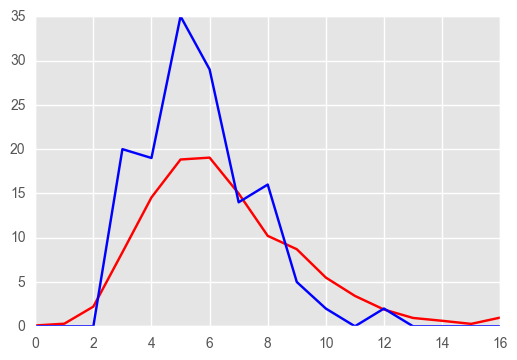

In [851]:
xs=np.linspace(0,16,17)
sol=df_target[df_target['id']==test_row['id']]
sol=np.array(sol[pax_list])
stderr=sum((model-sol[0])**2)**0.5/17
print(stderr)

ax=plt.plot(model,color='r')
ax=plt.plot(sol[0],color='b')

### Distance Module

In [644]:
def calculate_distance(x1,x2):
    dxn=abs(x1[timelist]-x2[timelist])
    dxn=np.where(dxn > 0.5 * period, (dxn - period)/period, dxn/period)
    dxc=np.where(x1[cat_list]==x2[cat_list],0,1)
    dxo=abs(x1[ord_list]-x2[ord_list])/5.0

    dxn_tot=0
    dxn_tot=sum(dxn**2)
    dxc_tot=0
    dxc_tot=sum(dxc**2)
    dxo_tot=0
#    dxo_tot=sum(dxo**2)
    
    dx_total=(dxn_tot+dxc_tot+dxo_tot)**0.5
 
    #dx_total=sum(dxn**2)**0.5
    return dx_total

    

### Test Case for 1 Target Flight

In [646]:
print("Start Time:",datetime.datetime.now().time())
for test_index, test_row in df_target.iterrows():
    if(test_index>5): break
        
    solution=test_row[pax_list]
    nearest_neighbours=[]
    
    for train_index, train_row in \
    df_train[(df_train['s_model_type']==test_row['s_model_type']) &\
             (df_train['cat_s_plane_capacity']==test_row['cat_s_plane_capacity'])].iterrows():

#        if(train_index>10): break
        dist=calculate_distance(test_row,train_row)
        nearest_neighbours.append([test_index,train_index,dist]+train_row[pax_list].values.flatten().tolist())

        
    nearest_neighbours=np.asarray(nearest_neighbours)
    nearest_neighbours=nearest_neighbours[nearest_neighbours[:,2].argsort()]
    
    model=nearest_neighbours[:nn].mean(axis=0)[3:21]
    df_model.append([test_index]+model.tolist())

print("End Time:",datetime.datetime.now().time())

df_model=pd.DataFrame(df_model, columns=cols).set_index('id')
df_model.to_csv("glenn_test.csv")

Start Time: 14:45:12.686935
End Time: 14:45:55.752297


### Optimum Number of Nearest Neighbours

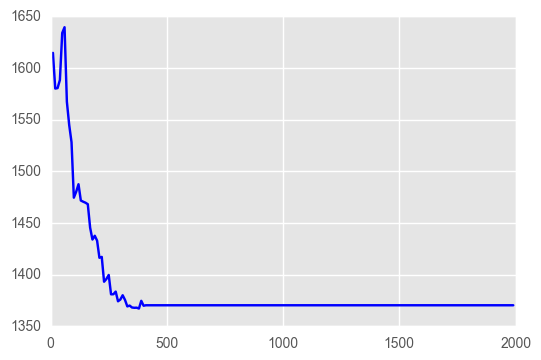

In [815]:
std_errlist=[]
nn_errlist=[]
sol=np.asarray(solution)
for nn in range(10,2000,10):

    av_dist=nearest_neighbours[:nn].mean(axis=0)[3:21]
    std_dist=nearest_neighbours[:nn].std(axis=0)[3:21]

    stderr=sum((av_dist-sol)**2)
    std_errlist.append(stderr)
    nn_errlist.append(nn)
    
ax=plt.plot(nn_errlist,std_errlist,color='b')
#ax=plt.errorbar(x=xs,y=av_dist,yerr=std_dist)
#ax=plt.plot(np.asarray(solution),color='b')

### Distribution of Distances for NN 

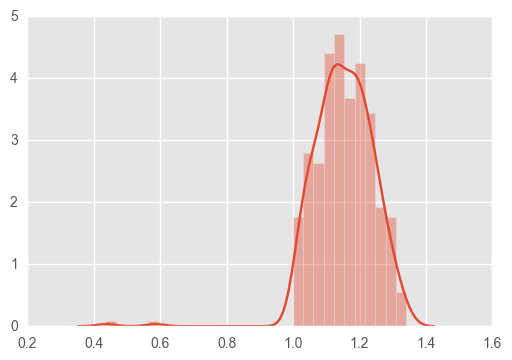

In [816]:
sns.distplot((nearest_neighbours[:,2][:2000]))

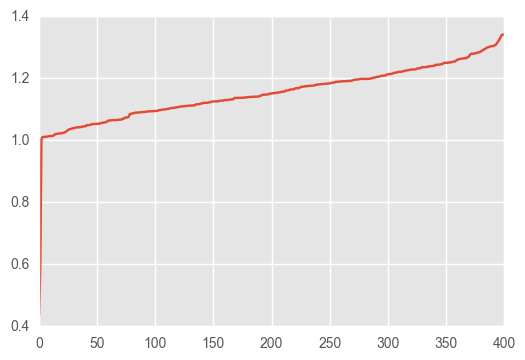

In [817]:
plt.plot(nearest_neighbours[:,2][:2000])

### Inspect nn=200

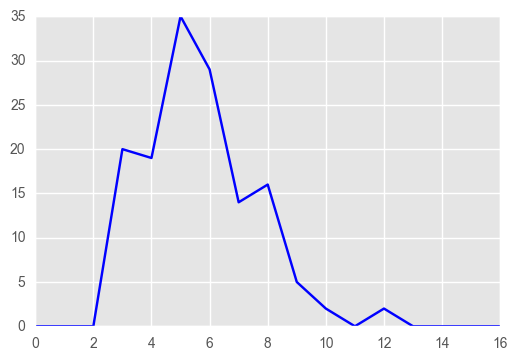

Flight Index:		 11
Flight no:		 10108
Prediction Date:	 2013-01-09 00:00:00
Target Date:		 2014-01-09 00:00:00
Model Type:		 52_weeks
Historical Data:
[ 11.           0.42857143   0.           1.28571429   8.14285714  28.
  30.28571429  31.85714286  17.42857143   8.           8.           3.
   2.14285714   1.28571429   0.14285714   0.           0.           0.        ]


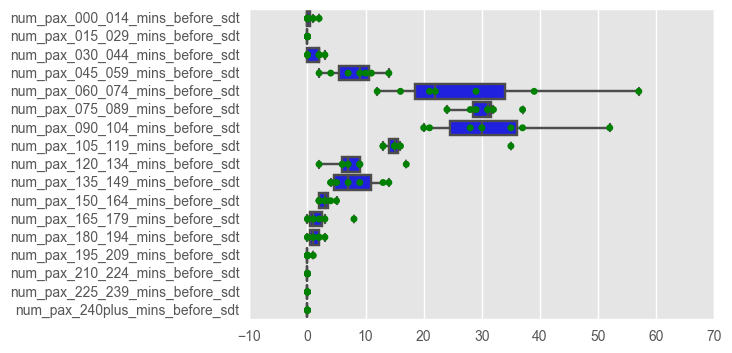

In [209]:
print ("Flight Index:\t\t",index)
print ("Flight no:\t\t",row['cat_i_flightno'])
print ("Prediction Date:\t",row['dt_prediction_date'])
print ("Target Date:\t\t",row['dt_target_date'])
print ("Model Type:\t\t",row['s_model_type'])

test_df=df_train[(df_train['cat_i_flightno']==row['cat_i_flightno']) & (df_train['s_model_type']==row['s_model_type'])]
if not test_df.empty: 
    print ("Historical Data:")
else: 
    print ("No Historical Data")
test_df

ax=sns.boxplot(data=test_df.ix[:,"num_pax_000_014_mins_before_sdt":],orient="h",color="b")
ax=sns.stripplot(data=test_df.ix[:,"num_pax_000_014_mins_before_sdt":],orient="h",color="g")
pred=np.array(test_df.ix[:,"num_pax_000_014_mins_before_sdt":].mean())
pred=np.append([index],pred)
print (pred)